In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nt = 50000
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)
dt = 0.1
Nu = 0.012      # Holton pp 58
Ns = 0.0012

w[0] = 0.1
bu[0] = 0
bs[0] = 1


# leap frog
for t in range(1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    


for t in range(1,nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t-1] + bs[t]*2.*dt
    else:
        w[t+1] = w[t-1] + bu[t]*2.*dt
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*2.*dt
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*2.*dt
    
M = bu[0]/Nu**2 - bs[0]/Ns**2

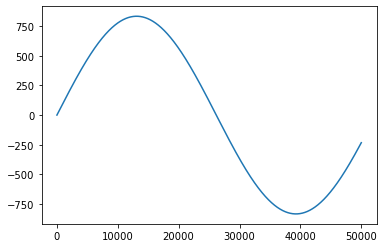

In [3]:
plt.plot(w)

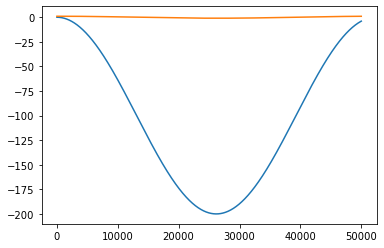

In [4]:
plt.plot(bu, label='bu')
plt.plot(bs, label='bs')

### TLM

In [5]:
# basic state?
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)

# p for prime, perturbation
wp = np.zeros(nt)
bup = np.zeros(nt)
bsp = np.zeros(nt)

# initial condition for basic state
#w[0] = 0.1
#bu[0] = 0
#bs[0] = 0

# initial condition for perturbaitons are all zeros, 
#wp[0] = 1e-4
#bup[0] = 1e-5
#bsp[0] = 1e-6

# initial condition for basic state
w[0] = 0.1
bu[0] = 0
bs[0] = 0

# initial condition for perturbaitons are all zeros, 
wp[0] = 0.1
bup[0] = 0
bsp[0] = 0.1

# leap frog
for t in range(1):
    if bs[t] > bu[t]:
        wp[t+1] = wp[t] + dt*bup[t]
        w[t+1] = w[t] + bs[t]*dt
    else:
        wp[t+1] = wp[t] + dt*bsp[t]
        w[t+1] = w[t] + bu[t]*dt
        
    bup[t+1] = bup[t] - (Nu**2)*wp[t]*dt
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bsp[t+1] = bsp[t] - (Ns**2)*wp[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    


for t in range(1,nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t-1] + bs[t]*2.*dt
        wp[t+1] = wp[t-1] + bsp[t]*2.*dt
    else:
        w[t+1] = w[t-1] + bu[t]*2.*dt
        wp[t+1] = wp[t-1] + bup[t]*2.*dt
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*2.*dt
    bup[t+1] = bup[t-1] - (Nu**2)*wp[t]*2.*dt
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*2.*dt
    bsp[t+1] = bsp[t-1] - (Ns**2)*wp[t]*2.*dt
tlm_pert = [wp, bup, bsp]


In [6]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

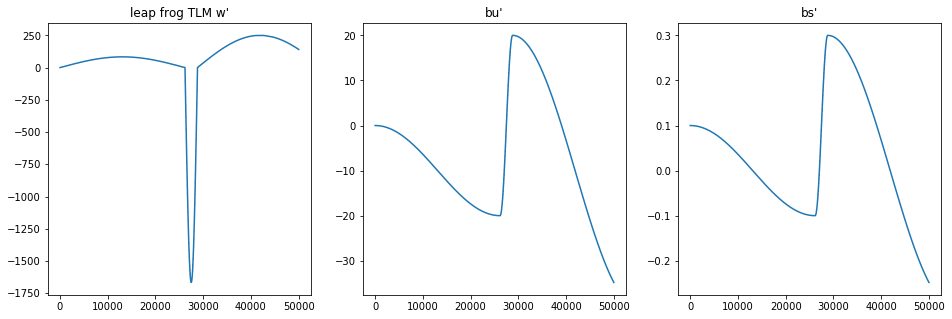

In [7]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows,
                      ncols=ncols, figsize=(16,5))
sens_subplots(wp, ax[0], "leap frog TLM w'")
sens_subplots(bup, ax[1], "bu'")
sens_subplots(bsp, ax[2], "bs'")

In [8]:
wp[-1], bup[-1], bsp[-1]

(140.52780851060803, -34.81050434906057, -0.24810504349060847)